In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [123]:
iris = load_iris()

In [124]:
x, y = iris.data, iris.target

In [125]:
df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=iris.feature_names+['target'])

In [126]:
df.shape

(150, 5)

In [127]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [129]:
scaler = StandardScaler()

In [130]:
x_scaled = scaler.fit_transform(x)

## Principal Component Analysis (PCA)

In [131]:
pca = PCA(n_components=2)

In [132]:
x1=x_scaled[:,0:2]

In [13]:
pca_recast = pca.fit_transform(x1)

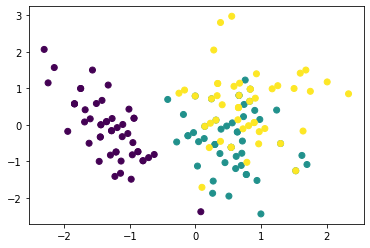

In [14]:
plt.scatter(pca_recast[:,0], pca_recast[:,1], c=y)

Explained Variance Ratio:
	[0.55878489 0.44121511]


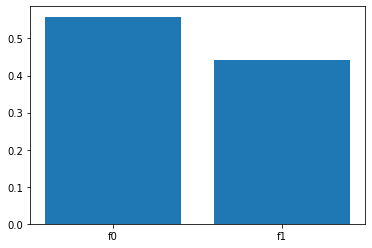

In [15]:
print(f'Explained Variance Ratio:\n\t{pca.explained_variance_ratio_}')
plt.bar(['f0', 'f1'], pca.explained_variance_ratio_);

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.55878489, 1.        ])

In [17]:
pca.get_precision()

array([[1.00725629, 0.1184229 ],
       [0.1184229 , 1.00725629]])

In [18]:
pca.get_covariance()

array([[ 1.00671141, -0.11835884],
       [-0.11835884,  1.00671141]])

In [19]:
pca.score(x_scaled[:,:2])

-2.830939849594073

In [20]:
for n in range(2, x.shape[1]+1):
    pca = PCA(n_components=n, )
    pca.fit_transform(x[:,0:n])
    print(f"{'N features:':10} {n}")
    print(f"{'Variance Ratio:':10} {pca.explained_variance_ratio_}")
    print(f"{'Score:':5} {pca.score(x[:,0:n])}")
#     print(f"{'Precision:'}\n {pca.get_precision()}")
    print('\n')

N features: 2
Variance Ratio: [0.78716571 0.21283429]
Score: -1.8051688297690944


N features: 3
Variance Ratio: [0.92464061 0.06046599 0.0148934 ]
Score: -2.7778049459974623


N features: 4
Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
Score: -2.532808843783388




## Multiple Correspondence Analysis (MCA): Categorical Variables

In [75]:
import mca

In [76]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [77]:
x = df.drop(labels=['target'], axis=1)

In [78]:
x_ohe = ohe.fit_transform(x)

In [79]:
df_ohe = pd.DataFrame(x_ohe, columns=ohe.get_feature_names(list(x.columns)))

In [80]:
df_ohe.head()

,sepal length (cm)_4.3,sepal length (cm)_4.4,sepal length (cm)_4.5,sepal length (cm)_4.6,sepal length (cm)_4.7,sepal length (cm)_4.8,sepal length (cm)_4.9,sepal length (cm)_5.0,sepal length (cm)_5.1,sepal length (cm)_5.2,sepal length (cm)_5.3,sepal length (cm)_5.4,sepal length (cm)_5.5,sepal length (cm)_5.6,sepal length (cm)_5.7,sepal length (cm)_5.8,sepal length (cm)_5.9,sepal length (cm)_6.0,sepal length (cm)_6.1,sepal length (cm)_6.2,sepal length (cm)_6.3,sepal length (cm)_6.4,sepal length (cm)_6.5,sepal length (cm)_6.6,sepal length (cm)_6.7,sepal length (cm)_6.8,sepal length (cm)_6.9,sepal length (cm)_7.0,sepal length (cm)_7.1,sepal length (cm)_7.2,sepal length (cm)_7.3,sepal length (cm)_7.4,sepal length (cm)_7.6,sepal length (cm)_7.7,sepal length (cm)_7.9,sepal width (cm)_2.0,sepal width (cm)_2.2,sepal width (cm)_2.3,sepal width (cm)_2.4,sepal width (cm)_2.5,...,petal length (cm)_4.9,petal length (cm)_5.0,petal length (cm)_5.1,petal length (cm)_5.2,petal length (cm)_5.3,petal length (cm)_5.4,petal length (cm)_5.5,petal length (cm)_5.6,petal length (cm)_5.7,petal length (cm)_5.8,petal length (cm)_5.9,petal length (cm)_6.0,petal length (cm)_6.1,petal length (cm)_6.3,petal length (cm)_6.4,petal length (cm)_6.6,petal length (cm)_6.7,petal length (cm)_6.9,petal width (cm)_0.1,petal width (cm)_0.2,petal width (cm)_0.3,petal width (cm)_0.4,petal width (cm)_0.5,petal width (cm)_0.6,petal width (cm)_1.0,petal width (cm)_1.1,petal width (cm)_1.2,petal width (cm)_1.3,petal width (cm)_1.4,petal width (cm)_1.5,petal width (cm)_1.6,petal width (cm)_1.7,petal width (cm)_1.8,petal width (cm)_1.9,petal width (cm)_2.0,petal width (cm)_2.1,petal width (cm)_2.2,petal width (cm)_2.3,petal width (cm)_2.4,petal width (cm)_2.5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
mca_df = mca.MCA(df_ohe)

In [100]:
mca_df.fs_r(N=70)

array([[-1.36145598,  0.03798011, -0.06571672, ...,  0.10794551,
        -0.06583705,  0.07389289],
       [-0.67942647,  0.06893237, -0.52032463, ...,  0.12394019,
         0.11615165,  0.06139176],
       [-0.90511485,  0.28665654, -0.37065077, ..., -0.0799417 ,
         0.01855144, -0.30198742],
       ...,
       [ 0.60947233,  0.66448705,  0.82190793, ..., -0.01065067,
         0.00217423,  0.04699201],
       [ 0.14774425,  0.62352724, -0.23881355, ..., -0.16551325,
         0.07710524, -0.01449257],
       [ 0.73682906,  0.41585724, -0.16481564, ...,  0.10546052,
         0.29165735,  0.17862823]])

In [101]:
mca_df1 = mca.MCA(df_ohe)

In [119]:
for n in np.arange(1, 0, -0.05):
  display(f"{'Percentage'} {np.round(n, decimals=2)} {'N of columns'} {mca_df1.fs_r(percent=n).shape[1]}")

'Percentage 1.0 N of columns 106'

'Percentage 0.95 N of columns 57'

'Percentage 0.9 N of columns 47'

'Percentage 0.85 N of columns 41'

'Percentage 0.8 N of columns 35'

'Percentage 0.75 N of columns 31'

'Percentage 0.7 N of columns 27'

'Percentage 0.65 N of columns 24'

'Percentage 0.6 N of columns 21'

'Percentage 0.55 N of columns 18'

'Percentage 0.5 N of columns 16'

'Percentage 0.45 N of columns 14'

'Percentage 0.4 N of columns 12'

'Percentage 0.35 N of columns 10'

'Percentage 0.3 N of columns 8'

'Percentage 0.25 N of columns 7'

'Percentage 0.2 N of columns 5'

'Percentage 0.15 N of columns 4'

'Percentage 0.1 N of columns 2'

'Percentage 0.05 N of columns 1'